In [1]:
%matplotlib inline
from __future__ import division
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
import csv
import pandas as pd
import matplotlib as mpl
from util.stragglers import *
#mpl.rcParams['text.usetex'] = True
#mpl.rcParams['text.latex.unicode'] = True

blues = cm.get_cmap(plt.get_cmap('Blues'))
greens = cm.get_cmap(plt.get_cmap('Greens'))
reds = cm.get_cmap(plt.get_cmap('Reds'))
oranges = cm.get_cmap(plt.get_cmap('Oranges'))
purples = cm.get_cmap(plt.get_cmap('Purples'))
greys = cm.get_cmap(plt.get_cmap('Greys'))

from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')

# Slowest task Impact

In [2]:
SparkComet     = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/UpTo32Nodes/comet_spark_NoIOweak.csv').drop(['Framework'],axis=1)
SparkWrangler  = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/UpTo32Nodes/wrangler_spark_NoIOweak.csv').drop(['Framework'],axis=1)
MPI4pyComet    = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/UpTo32Nodes/comet_mpi4py_NoIOweakUpTo32.csv').drop(['Framework'],axis=1)
MPI4pyWrangler = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/UpTo32Nodes/wrangler_mpi4py_NoIOweakUpTo32.csv').drop(['Framework'],axis=1)
DaskComet      = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/UpTo32Nodes/comet_dask_NoIOweak146.csv').drop(['Framework'],axis=1)

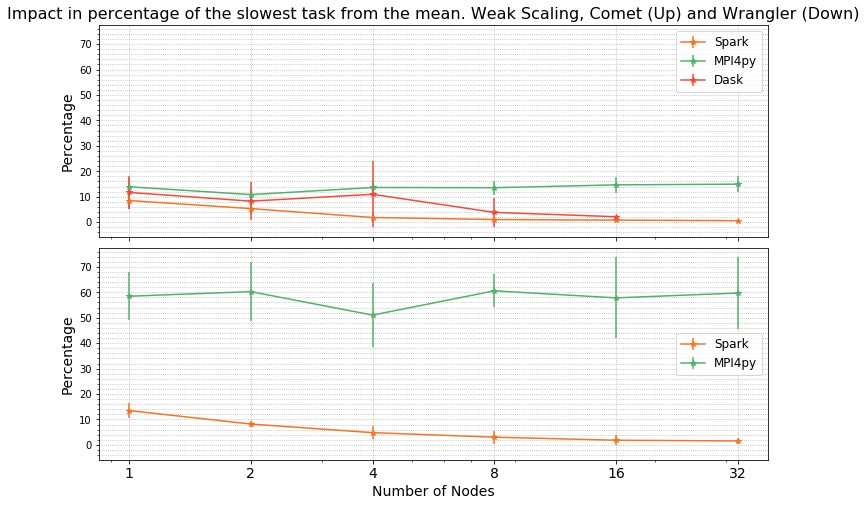

In [3]:
impactCSpark  = slowest_impact(SparkComet,nodes=[1,2,4,8,16,32],center='mean')
impactWSpark  = slowest_impact(SparkWrangler,nodes=[1,2,4,8,16,32],center='mean')
impactCMPI4py = slowest_impact(MPI4pyComet,nodes=[1,2,4,8,16,32],center='mean')
impactWMPI4py = slowest_impact(MPI4pyWrangler,nodes=[1,2,4,8,16,32],center='mean')
impactCDask   = slowest_impact(DaskComet,nodes=[1,2,4,8,16,32],center='mean')

fig,axes = plt.subplots(nrows=2,ncols=1, sharex=True,sharey=True,figsize=[12,8],gridspec_kw={'wspace':0.05, 'hspace':0.05})

axes[0].errorbar([1,2,4,8,16,32],[np.mean(D)*100 for D in impactCSpark],yerr=[np.std(D)*100 for D in impactCSpark],color=oranges(150),marker='*',label='Spark')
axes[0].errorbar([1,2,4,8,16,32],[np.mean(D)*100 for D in impactCMPI4py],yerr=[np.std(D)*100 for D in impactCMPI4py],color=greens(150),marker='*',label='MPI4py')
axes[0].errorbar([1,2,4,8,16,32],[np.mean(D)*100 for D in impactCDask],yerr=[np.std(D)*100 for D in impactCDask],color=reds(150),marker='*',label='Dask')
axes[1].errorbar([1,2,4,8,16,32],[np.mean(D)*100 for D in impactWSpark],yerr=[np.std(D)*100 for D in impactWSpark],color=oranges(150),marker='*',label='Spark')
axes[1].errorbar([1,2,4,8,16,32],[np.mean(D)*100 for D in impactWMPI4py],yerr=[np.std(D)*100 for D in impactWMPI4py],color=greens(150),marker='*',label='MPI4py')
axes[0].set_ylabel('Percentage',fontsize=14)
axes[1].set_ylabel('Percentage',fontsize=14)
axes[1].set_xscale(value='log')
axes[1].minorticks_on()
axes[0].minorticks_on()
axes[0].grid('on',linestyle=':')
axes[1].grid('on',linestyle=':')
axes[0].grid(axis='y',which='minor', linestyle=':')
axes[1].grid(axis='y',which='minor', linestyle=':')
axes[1].set_xticks([1,2,4,8,16,32])
axes[1].set_xticklabels(['1','2','4','8','16','32'],fontsize=14)
axes[1].set_xlabel('Number of Nodes',fontsize=14)
axes[0].set_title('Impact in percentage of the slowest task from the mean. Weak Scaling, Comet (Up) and Wrangler (Down)',fontsize=16)
axes[1].legend(fontsize=12)
axes[0].legend(fontsize=12)

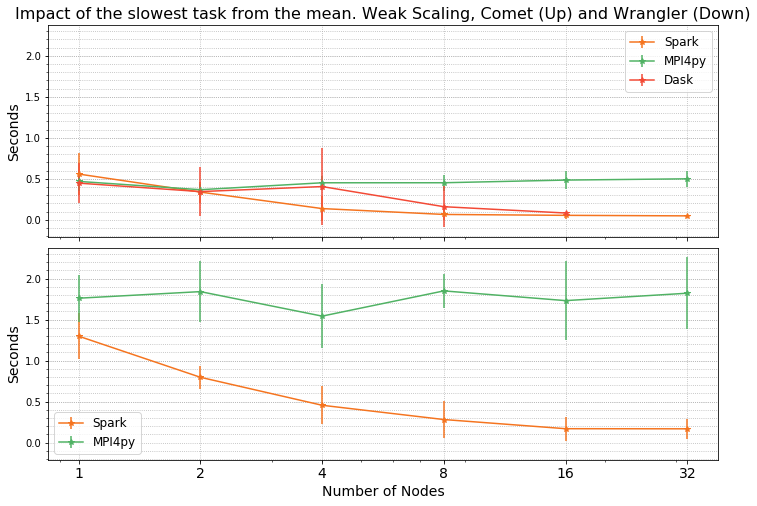

In [4]:
impactCSpark  = slowest_impact(SparkComet,nodes=[1,2,4,8,16,32],center='meanabs',div=1000.0)
impactWSpark  = slowest_impact(SparkWrangler,nodes=[1,2,4,8,16,32],center='meanabs',div=1000.0)
impactCMPI4py = slowest_impact(MPI4pyComet,nodes=[1,2,4,8,16,32],center='meanabs',div=1.0)
impactWMPI4py = slowest_impact(MPI4pyWrangler,nodes=[1,2,4,8,16,32],center='meanabs',div=1.0)
impactCDask   = slowest_impact(DaskComet,nodes=[1,2,4,8,16,32],center='meanabs',div=1000.0)

fig,axes = plt.subplots(nrows=2,ncols=1, sharex=True,sharey=True,figsize=[12,8],gridspec_kw={'wspace':0.05, 'hspace':0.05})

axes[0].errorbar([1,2,4,8,16,32],[np.mean(D) for D in impactCSpark],yerr=[np.std(D) for D in impactCSpark],color=oranges(150),marker='*',label='Spark')
axes[0].errorbar([1,2,4,8,16,32],[np.mean(D) for D in impactCMPI4py],yerr=[np.std(D) for D in impactCMPI4py],color=greens(150),marker='*',label='MPI4py')
axes[0].errorbar([1,2,4,8,16,32],[np.mean(D) for D in impactCDask],yerr=[np.std(D) for D in impactCDask],color=reds(150),marker='*',label='Dask')
axes[1].errorbar([1,2,4,8,16,32],[np.mean(D) for D in impactWSpark],yerr=[np.std(D) for D in impactWSpark],color=oranges(150),marker='*',label='Spark')
axes[1].errorbar([1,2,4,8,16,32],[np.mean(D) for D in impactWMPI4py],yerr=[np.std(D) for D in impactWMPI4py],color=greens(150),marker='*',label='MPI4py')
axes[0].set_ylabel('Seconds',fontsize=14)
axes[1].set_ylabel('Seconds',fontsize=14)
axes[1].set_xscale(value='log')
axes[1].minorticks_on()
axes[0].minorticks_on()
axes[0].grid('on',linestyle=':')
axes[1].grid('on',linestyle=':')
axes[0].grid(axis='y',which='minor', linestyle=':')
axes[1].grid(axis='y',which='minor', linestyle=':')
axes[1].set_xticks([1,2,4,8,16,32])
axes[1].set_xticklabels(['1','2','4','8','16','32'],fontsize=14)
axes[1].set_xlabel('Number of Nodes',fontsize=14)
axes[0].set_title('Impact of the slowest task from the mean. Weak Scaling, Comet (Up) and Wrangler (Down)',fontsize=16)
axes[1].legend(fontsize=12)
axes[0].legend(fontsize=12)


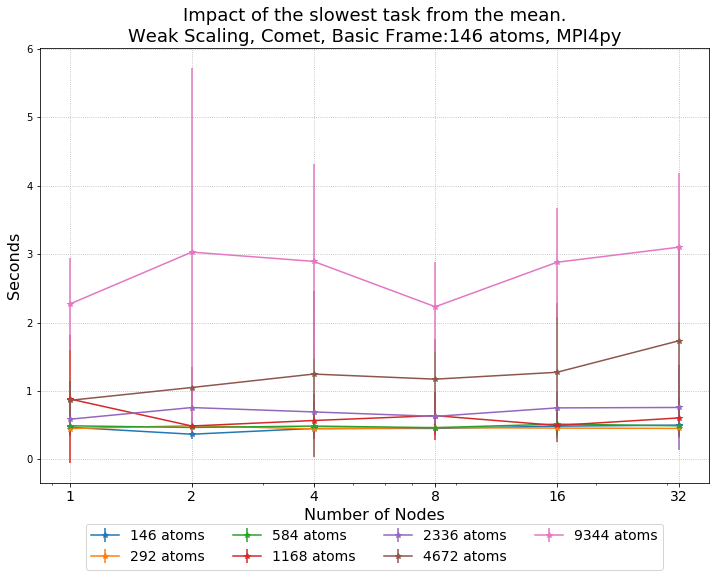

In [5]:
MPI4pyComet1      = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/UpTo32Nodes/comet_mpi4py_NoIOweakUpTo32.csv').drop(['Framework'],axis=1)
coeffCMPI4py      = slowest_impact(MPI4pyComet1,nodes=[1,2,4,8,16,32],center='meanabs',div=1.0)
MPI4pyComet1      = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/UpTo32Nodes/comet_mpi4py_NoIOweak292.csv').drop(['Framework'],axis=1)
coeffCMPI4py292   = slowest_impact(MPI4pyComet1,nodes=[1,2,4,8,16,32],center='meanabs',div=1.0)
MPI4pyComet1      = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/UpTo32Nodes/comet_mpi4py_NoIOweak584.csv').drop(['Framework'],axis=1)
coeffCMPI4py584   = slowest_impact(MPI4pyComet1,nodes=[1,2,4,8,16,32],center='meanabs',div=1.0)
MPI4pyComet1      = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/UpTo32Nodes/comet_mpi4py_NoIOweak1168.csv').drop(['Framework'],axis=1)
coeffCMPI4py1168  = slowest_impact(MPI4pyComet1,nodes=[1,2,4,8,16,32],center='meanabs',div=1.0)
MPI4pyComet1      = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/UpTo32Nodes/comet_mpi4py_NoIOweak2336.csv').drop(['Framework'],axis=1)
coeffCMPI4py2336  = slowest_impact(MPI4pyComet1,nodes=[1,2,4,8,16,32],center='meanabs',div=1.0)
MPI4pyComet1      = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/UpTo32Nodes/comet_mpi4py_NoIOweak4672.csv').drop(['Framework'],axis=1)
coeffCMPI4py4672  = slowest_impact(MPI4pyComet1,nodes=[1,2,4,8,16,32],center='meanabs',div=1.0)
MPI4pyComet1      = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/UpTo32Nodes/comet_mpi4py_NoIOweak9344.csv').drop(['Framework'],axis=1)
coeffCMPI4py9344  = slowest_impact(MPI4pyComet1,nodes=[1,2,4,8,16,32],center='meanabs',div=1.0)
MPI4pyComet1      = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/UpTo32Nodes/comet_mpi4py_NoIOweak18688.csv').drop(['Framework'],axis=1)
coeffCMPI4py18688 = slowest_impact(MPI4pyComet1,nodes=[1,2,4,8,16,32],center='meanabs',div=1.0)

fig,axes = plt.subplots(nrows=1,ncols=1, sharex=True,sharey=True,figsize=[12,8],gridspec_kw={'wspace':0.05, 'hspace':0.05})
axes.errorbar([1,2,4,8,16,32],[np.mean(D) for D in coeffCMPI4py],yerr=[np.std(D) for D in coeffCMPI4py],marker='*',label='146 atoms')
axes.errorbar([1,2,4,8,16,32],[np.mean(D) for D in coeffCMPI4py292],yerr=[np.std(D) for D in coeffCMPI4py292],marker='*',label='292 atoms')
axes.errorbar([1,2,4,8,16,32],[np.mean(D) for D in coeffCMPI4py584],yerr=[np.std(D) for D in coeffCMPI4py584],marker='*',label='584 atoms')
axes.errorbar([1,2,4,8,16,32],[np.mean(D) for D in coeffCMPI4py1168],yerr=[np.std(D) for D in coeffCMPI4py1168],marker='*',label='1168 atoms')
axes.errorbar([1,2,4,8,16,32],[np.mean(D) for D in coeffCMPI4py2336],yerr=[np.std(D) for D in coeffCMPI4py2336],marker='*',label='2336 atoms')
axes.errorbar([1,2,4,8,16,32],[np.mean(D) for D in coeffCMPI4py4672],yerr=[np.std(D) for D in coeffCMPI4py4672],marker='*',label='4672 atoms')
axes.errorbar([1,2,4,8,16,32],[np.mean(D) for D in coeffCMPI4py9344],yerr=[np.std(D) for D in coeffCMPI4py9344],marker='*',label='9344 atoms')
#axes.errorbar([1,2,4,8,16,32],[np.mean(D) for D in coeffCMPI4py18688],yerr=[np.std(D) for D in coeffCMPI4py18688],marker='*',label='18688 atoms')
axes.set_title('Impact of the slowest task from the mean.\nWeak Scaling, Comet, Basic Frame:146 atoms, MPI4py',fontsize=18)
axes.set_xlabel('Number of Nodes',fontsize=16)
axes.set_xscale('log')
axes.set_xticks([1,2,4,8,16,32])
axes.set_xticklabels(['1','2','4','8','16','32'],fontsize=14)
axes.set_ylabel('Seconds',fontsize=16)
axes.grid(axis='y',which='minor', linestyle=':')
axes.grid('on',linestyle=':')
axes.grid(axis='y',which='minor', linestyle=':')
axes.legend(fontsize=14,bbox_to_anchor=(0.,-0.2,1,0), loc='lower center',ncol=4, borderaxespad=0.)

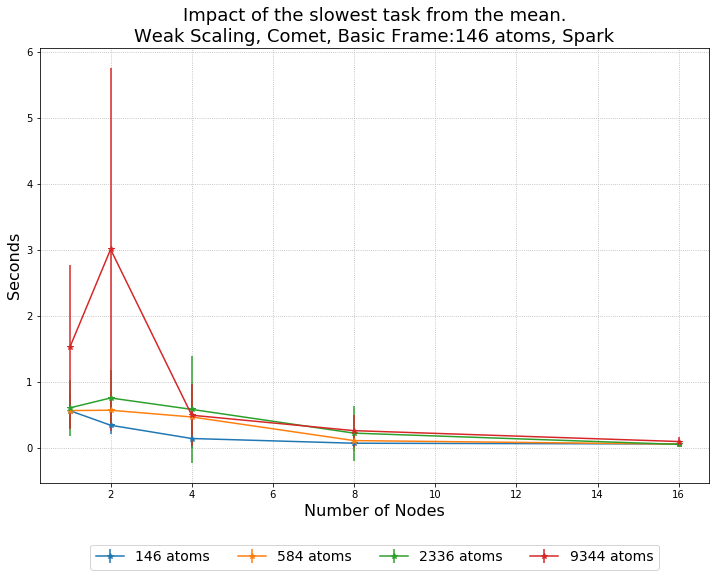

In [6]:
SparkComet1       = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/UpTo32Nodes/comet_spark_NoIOweak.csv').drop(['Framework'],axis=1)
coeffCSpark      = slowest_impact(SparkComet1,nodes=[1,2,4,8,16],center='meanabs',div=1000.0)
SparkComet1       = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/UpTo32Nodes/comet_spark_NoIOweak584.csv').drop(['Framework'],axis=1)
coeffCSpark584   = slowest_impact(SparkComet1,nodes=[1,2,4,8,16],center='meanabs',div=1000.0)
SparkComet1       = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/UpTo32Nodes/comet_spark_NoIOweak2336.csv').drop(['Framework'],axis=1)
coeffCSpark2336  = slowest_impact(SparkComet1,nodes=[1,2,4,8,16],center='meanabs',div=1000.0)
SparkComet1       = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/UpTo32Nodes/comet_spark_NoIOweak9344.csv').drop(['Framework'],axis=1)
coeffCSpark9344  = slowest_impact(SparkComet1,nodes=[1,2,4,8,16],center='meanabs',div=1000.0)

fig,axes = plt.subplots(nrows=1,ncols=1, sharex=True,sharey=True,figsize=[12,8],gridspec_kw={'wspace':0.05, 'hspace':0.05})
axes.errorbar([1,2,4,8,16],[np.mean(D) for D in coeffCSpark],yerr=[np.std(D) for D in coeffCSpark],marker='*',label='146 atoms')
axes.errorbar([1,2,4,8,16],[np.mean(D) for D in coeffCSpark584],yerr=[np.std(D) for D in coeffCSpark584],marker='*',label='584 atoms')
axes.errorbar([1,2,4,8,16],[np.mean(D) for D in coeffCSpark2336],yerr=[np.std(D) for D in coeffCSpark2336],marker='*',label='2336 atoms')
axes.errorbar([1,2,4,8,16],[np.mean(D) for D in coeffCSpark9344],yerr=[np.std(D) for D in coeffCSpark9344],marker='*',label='9344 atoms')
axes.set_title('Impact of the slowest task from the mean.\nWeak Scaling, Comet, Basic Frame:146 atoms, Spark',fontsize=18)
axes.set_xlabel('Number of Nodes',fontsize=16)
axes.set_ylabel('Seconds',fontsize=16)
axes.grid(axis='y',which='minor', linestyle=':')
axes.grid('on',linestyle=':')
axes.grid(axis='y',which='minor', linestyle=':')
axes.legend(fontsize=14,bbox_to_anchor=(0.,-0.2,1,0), loc='lower center',ncol=5, borderaxespad=0.)

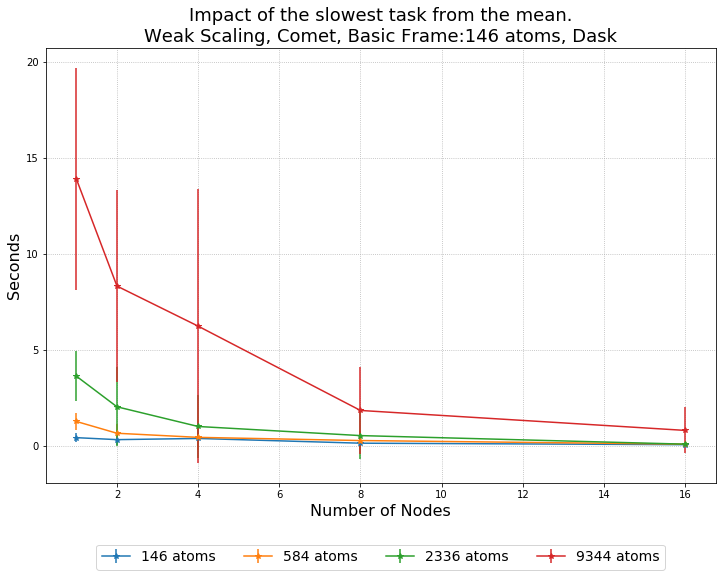

In [7]:
DaskComet       = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/UpTo32Nodes/comet_dask_NoIOweak146.csv').drop(['Framework'],axis=1)
coeffCDask      = slowest_impact(DaskComet,nodes=[1,2,4,8,16],center='meanabs',div=1000.0)
DaskComet       = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/UpTo32Nodes/comet_dask_NoIOweak584.csv').drop(['Framework'],axis=1)
coeffCDask584   = slowest_impact(DaskComet,nodes=[1,2,4,8,16],center='meanabs',div=1000.0)
DaskComet       = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/UpTo32Nodes/comet_dask_NoIOweak2336.csv').drop(['Framework'],axis=1)
coeffCDask2336  = slowest_impact(DaskComet,nodes=[1,2,4,8,16],center='meanabs',div=1000.0)
DaskComet       = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/UpTo32Nodes/comet_dask_NoIOweak9344.csv').drop(['Framework'],axis=1)
coeffCDask9344  = slowest_impact(DaskComet,nodes=[1,2,4,8,16],center='meanabs',div=1000.0)

fig,axes = plt.subplots(nrows=1,ncols=1, sharex=True,sharey=True,figsize=[12,8],gridspec_kw={'wspace':0.05, 'hspace':0.05})
axes.errorbar([1,2,4,8,16],[np.mean(D) for D in coeffCDask],yerr=[np.std(D) for D in coeffCDask],marker='*',label='146 atoms')
axes.errorbar([1,2,4,8,16],[np.mean(D) for D in coeffCDask584],yerr=[np.std(D) for D in coeffCDask584],marker='*',label='584 atoms')
axes.errorbar([1,2,4,8,16],[np.mean(D) for D in coeffCDask2336],yerr=[np.std(D) for D in coeffCDask2336],marker='*',label='2336 atoms')
axes.errorbar([1,2,4,8,16],[np.mean(D) for D in coeffCDask9344],yerr=[np.std(D) for D in coeffCDask9344],marker='*',label='9344 atoms')
axes.set_title('Impact of the slowest task from the mean.\nWeak Scaling, Comet, Basic Frame:146 atoms, Dask',fontsize=18)
axes.set_xlabel('Number of Nodes',fontsize=16)
axes.set_ylabel('Seconds',fontsize=16)
axes.grid(axis='y',which='minor', linestyle=':')
axes.grid('on',linestyle=':')
axes.grid(axis='y',which='minor', linestyle=':')
axes.legend(fontsize=14,bbox_to_anchor=(0.,-0.2,1,0), loc='lower center',ncol=5, borderaxespad=0.)

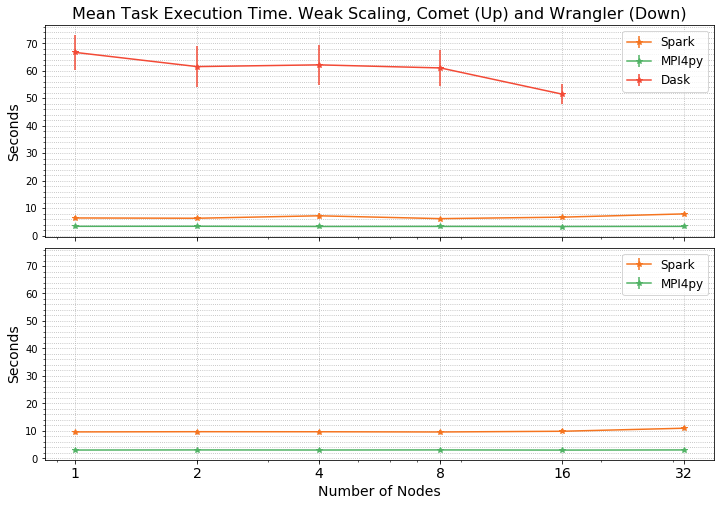

In [8]:
centersCSpark  = task_centers(SparkComet,nodes=[1,2,4,8,16,32],measure='mean')
centersWSpark  = task_centers(SparkWrangler,nodes=[1,2,4,8,16,32],measure='mean')
centersCMPI4py = task_centers(MPI4pyComet,nodes=[1,2,4,8,16,32],measure='mean')
centersWMPI4py = task_centers(MPI4pyWrangler,nodes=[1,2,4,8,16,32],measure='mean')
centersCDask   = task_centers(DaskComet,nodes=[1,2,4,8,16,32],measure='mean')

fig,axes = plt.subplots(nrows=2,ncols=1, sharex=True,sharey=True,figsize=[12,8],gridspec_kw={'wspace':0.05, 'hspace':0.05})

axes[0].errorbar([1,2,4,8,16,32],[np.mean(D)/1000.0 for D in centersCSpark],yerr=[np.std(D)/1000.0 for D in centersCSpark],color=oranges(150),marker='*',label='Spark')
axes[1].errorbar([1,2,4,8,16,32],[np.mean(D)/1000.0 for D in centersWSpark],yerr=[np.std(D)/1000.0 for D in centersWSpark],color=oranges(150),marker='*',label='Spark')
axes[0].errorbar([1,2,4,8,16,32],[np.mean(D)/1.0 for D in centersCMPI4py],yerr=[np.std(D)/1.0 for D in centersCMPI4py],color=greens(150),marker='*',label='MPI4py')
axes[1].errorbar([1,2,4,8,16,32],[np.mean(D)/1.0 for D in centersWMPI4py],yerr=[np.std(D)/1.0 for D in centersWMPI4py],color=greens(150),marker='*',label='MPI4py')
axes[0].errorbar([1,2,4,8,16,32],[np.mean(D)/1000.0 for D in centersCDask],yerr=[np.std(D)/1000.0 for D in centersCDask],color=reds(150),marker='*',label='Dask')
axes[0].set_ylabel('Seconds',fontsize=14)
axes[1].set_ylabel('Seconds',fontsize=14)
axes[1].set_xscale(value='log')
axes[1].minorticks_on()
axes[0].minorticks_on()
axes[0].grid('on',linestyle=':')
axes[1].grid('on',linestyle=':')
axes[0].grid(axis='y',which='minor', linestyle=':')
axes[1].grid(axis='y',which='minor', linestyle=':')
axes[1].set_xticks([1,2,4,8,16,32])
axes[1].set_xticklabels(['1','2','4','8','16','32'],fontsize=14)
axes[1].set_xlabel('Number of Nodes',fontsize=14)
axes[0].set_title('Mean Task Execution Time. Weak Scaling, Comet (Up) and Wrangler (Down)',fontsize=16)
axes[1].legend(fontsize=12)
axes[0].legend(fontsize=12)


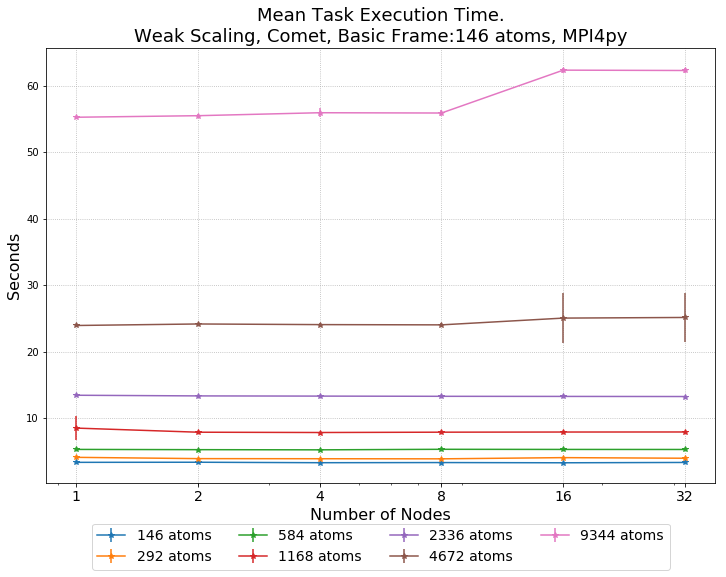

In [9]:
MPI4pyComet1      = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/UpTo32Nodes/comet_mpi4py_NoIOweakUpTo32.csv').drop(['Framework'],axis=1)
coeffCMPI4py      = task_centers(MPI4pyComet1,nodes=[1,2,4,8,16,32],measure='mean')
MPI4pyComet1      = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/UpTo32Nodes/comet_mpi4py_NoIOweak292.csv').drop(['Framework'],axis=1)
coeffCMPI4py292   = task_centers(MPI4pyComet1,nodes=[1,2,4,8,16,32],measure='mean')
MPI4pyComet1      = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/UpTo32Nodes/comet_mpi4py_NoIOweak584.csv').drop(['Framework'],axis=1)
coeffCMPI4py584   = task_centers(MPI4pyComet1,nodes=[1,2,4,8,16,32],measure='mean')
MPI4pyComet1      = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/UpTo32Nodes/comet_mpi4py_NoIOweak1168.csv').drop(['Framework'],axis=1)
coeffCMPI4py1168  = task_centers(MPI4pyComet1,nodes=[1,2,4,8,16,32],measure='mean')
MPI4pyComet1      = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/UpTo32Nodes/comet_mpi4py_NoIOweak2336.csv').drop(['Framework'],axis=1)
coeffCMPI4py2336  = task_centers(MPI4pyComet1,nodes=[1,2,4,8,16,32],measure='mean')
MPI4pyComet1      = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/UpTo32Nodes/comet_mpi4py_NoIOweak4672.csv').drop(['Framework'],axis=1)
coeffCMPI4py4672  = task_centers(MPI4pyComet1,nodes=[1,2,4,8,16,32],measure='mean')
MPI4pyComet1      = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/UpTo32Nodes/comet_mpi4py_NoIOweak9344.csv').drop(['Framework'],axis=1)
coeffCMPI4py9344  = task_centers(MPI4pyComet1,nodes=[1,2,4,8,16,32],measure='mean')
MPI4pyComet1      = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/UpTo32Nodes/comet_mpi4py_NoIOweak18688.csv').drop(['Framework'],axis=1)
coeffCMPI4py18688 = task_centers(MPI4pyComet1,nodes=[1,2,4,8,16,32],measure='mean')

fig,axes = plt.subplots(nrows=1,ncols=1, sharex=True,sharey=True,figsize=[12,8],gridspec_kw={'wspace':0.05, 'hspace':0.05})
axes.errorbar([1,2,4,8,16,32],[np.mean(D) for D in coeffCMPI4py],yerr=[np.std(D) for D in coeffCMPI4py],marker='*',label='146 atoms')
axes.errorbar([1,2,4,8,16,32],[np.mean(D) for D in coeffCMPI4py292],yerr=[np.std(D) for D in coeffCMPI4py292],marker='*',label='292 atoms')
axes.errorbar([1,2,4,8,16,32],[np.mean(D) for D in coeffCMPI4py584],yerr=[np.std(D) for D in coeffCMPI4py584],marker='*',label='584 atoms')
axes.errorbar([1,2,4,8,16,32],[np.mean(D) for D in coeffCMPI4py1168],yerr=[np.std(D) for D in coeffCMPI4py1168],marker='*',label='1168 atoms')
axes.errorbar([1,2,4,8,16,32],[np.mean(D) for D in coeffCMPI4py2336],yerr=[np.std(D) for D in coeffCMPI4py2336],marker='*',label='2336 atoms')
axes.errorbar([1,2,4,8,16,32],[np.mean(D) for D in coeffCMPI4py4672],yerr=[np.std(D) for D in coeffCMPI4py4672],marker='*',label='4672 atoms')
axes.errorbar([1,2,4,8,16,32],[np.mean(D) for D in coeffCMPI4py9344],yerr=[np.std(D) for D in coeffCMPI4py9344],marker='*',label='9344 atoms')
#axes.errorbar([1,2,4,8,16,32],[np.mean(D) for D in coeffCMPI4py18688],yerr=[np.std(D) for D in coeffCMPI4py18688],marker='*',label='18688 atoms')
axes.set_title('Mean Task Execution Time.\nWeak Scaling, Comet, Basic Frame:146 atoms, MPI4py',fontsize=18)
axes.set_xlabel('Number of Nodes',fontsize=16)
axes.set_xscale('log')
axes.set_xticks([1,2,4,8,16,32])
axes.set_xticklabels(['1','2','4','8','16','32'],fontsize=14)
axes.set_ylabel('Seconds',fontsize=16)
axes.grid(axis='y',which='minor', linestyle=':')
axes.grid('on',linestyle=':')
axes.grid(axis='y',which='minor', linestyle=':')
axes.legend(fontsize=14,bbox_to_anchor=(0.,-0.2,1,0), loc='lower center',ncol=4, borderaxespad=0.)

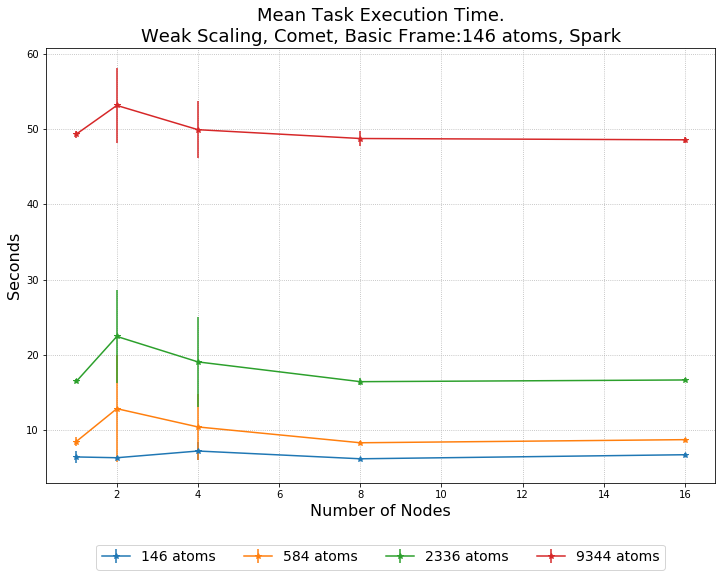

In [10]:
SparkComet1       = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/UpTo32Nodes/comet_spark_NoIOweak.csv').drop(['Framework'],axis=1)
coeffCSpark      = task_centers(SparkComet1,nodes=[1,2,4,8,16],measure='mean')
SparkComet1       = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/UpTo32Nodes/comet_spark_NoIOweak584.csv').drop(['Framework'],axis=1)
coeffCSpark584   = task_centers(SparkComet1,nodes=[1,2,4,8,16],measure='mean')
SparkComet1       = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/UpTo32Nodes/comet_spark_NoIOweak2336.csv').drop(['Framework'],axis=1)
coeffCSpark2336  = task_centers(SparkComet1,nodes=[1,2,4,8,16],measure='mean')
SparkComet1       = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/UpTo32Nodes/comet_spark_NoIOweak9344.csv').drop(['Framework'],axis=1)
coeffCSpark9344  = task_centers(SparkComet1,nodes=[1,2,4,8,16],measure='mean')

fig,axes = plt.subplots(nrows=1,ncols=1, sharex=True,sharey=True,figsize=[12,8],gridspec_kw={'wspace':0.05, 'hspace':0.05})
axes.errorbar([1,2,4,8,16],[np.mean(D)/1000.0 for D in coeffCSpark],yerr=[np.std(D)/1000.0 for D in coeffCSpark],marker='*',label='146 atoms')
axes.errorbar([1,2,4,8,16],[np.mean(D)/1000.0 for D in coeffCSpark584],yerr=[np.std(D)/1000.0 for D in coeffCSpark584],marker='*',label='584 atoms')
axes.errorbar([1,2,4,8,16],[np.mean(D)/1000.0 for D in coeffCSpark2336],yerr=[np.std(D)/1000.0 for D in coeffCSpark2336],marker='*',label='2336 atoms')
axes.errorbar([1,2,4,8,16],[np.mean(D)/1000.0 for D in coeffCSpark9344],yerr=[np.std(D)/1000.0 for D in coeffCSpark9344],marker='*',label='9344 atoms')
axes.set_title('Mean Task Execution Time.\nWeak Scaling, Comet, Basic Frame:146 atoms, Spark',fontsize=18)
axes.set_xlabel('Number of Nodes',fontsize=16)
axes.set_ylabel('Seconds',fontsize=16)
axes.grid(axis='y',which='minor', linestyle=':')
axes.grid('on',linestyle=':')
axes.grid(axis='y',which='minor', linestyle=':')
axes.legend(fontsize=14,bbox_to_anchor=(0.,-0.2,1,0), loc='lower center',ncol=5, borderaxespad=0.)

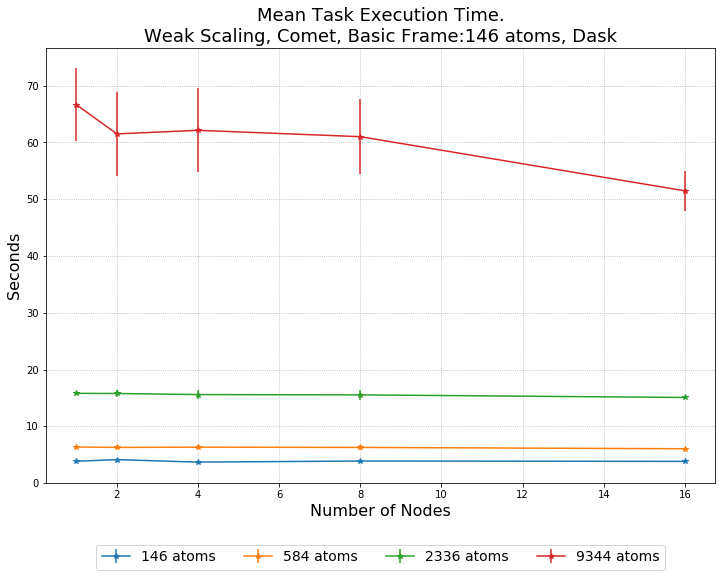

In [11]:
DaskComet       = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/UpTo32Nodes/comet_dask_NoIOweak146.csv').drop(['Framework'],axis=1)
coeffCDask      = task_centers(DaskComet,nodes=[1,2,4,8,16],measure='mean')
DaskComet       = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/UpTo32Nodes/comet_dask_NoIOweak584.csv').drop(['Framework'],axis=1)
coeffCDask584   = task_centers(DaskComet,nodes=[1,2,4,8,16],measure='mean')
DaskComet       = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/UpTo32Nodes/comet_dask_NoIOweak2336.csv').drop(['Framework'],axis=1)
coeffCDask2336  = task_centers(DaskComet,nodes=[1,2,4,8,16],measure='mean')
DaskComet       = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/UpTo32Nodes/comet_dask_NoIOweak9344.csv').drop(['Framework'],axis=1)
coeffCDask9344  = task_centers(DaskComet,nodes=[1,2,4,8,16],measure='mean')

fig,axes = plt.subplots(nrows=1,ncols=1, sharex=True,sharey=True,figsize=[12,8],gridspec_kw={'wspace':0.05, 'hspace':0.05})
axes.errorbar([1,2,4,8,16],[np.mean(D)/1000.0 for D in coeffCDask],yerr=[np.std(D)/1000.0 for D in coeffCDask],marker='*',label='146 atoms')
axes.errorbar([1,2,4,8,16],[np.mean(D)/1000.0 for D in coeffCDask584],yerr=[np.std(D)/1000.0 for D in coeffCDask584],marker='*',label='584 atoms')
axes.errorbar([1,2,4,8,16],[np.mean(D)/1000.0 for D in coeffCDask2336],yerr=[np.std(D)/1000.0 for D in coeffCDask2336],marker='*',label='2336 atoms')
axes.errorbar([1,2,4,8,16],[np.mean(D)/1000.0 for D in coeffCDask9344],yerr=[np.std(D)/1000.0 for D in coeffCDask9344],marker='*',label='9344 atoms')
axes.set_title('Mean Task Execution Time.\nWeak Scaling, Comet, Basic Frame:146 atoms, Dask',fontsize=18)
axes.set_xlabel('Number of Nodes',fontsize=16)
axes.set_ylabel('Seconds',fontsize=16)
axes.grid(axis='y',which='minor', linestyle=':')
axes.grid('on',linestyle=':')
axes.grid(axis='y',which='minor', linestyle=':')
axes.legend(fontsize=14,bbox_to_anchor=(0.,-0.2,1,0), loc='lower center',ncol=5, borderaxespad=0.)

## Average Coefficient of variation

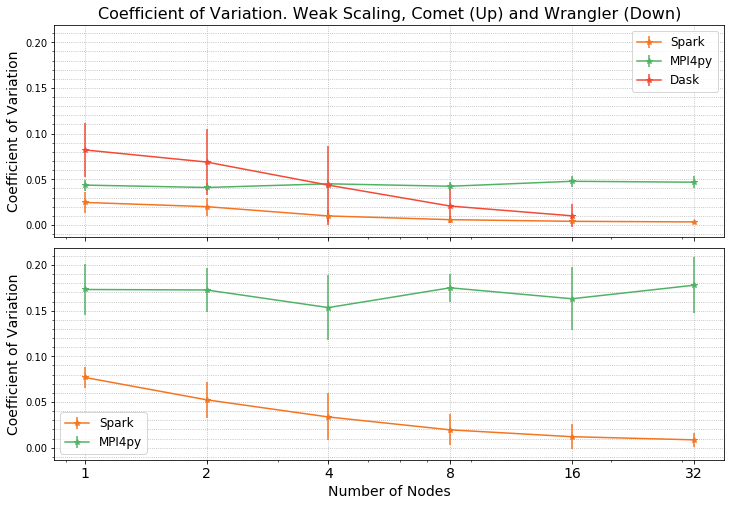

In [12]:
coeffCSpark  = task_coeff(SparkComet,nodes=[1,2,4,8,16,32])
coeffWSpark  = task_coeff(SparkWrangler,nodes=[1,2,4,8,16,32])
coeffCMPI4py = task_coeff(MPI4pyComet,nodes=[1,2,4,8,16,32])
coeffWMPI4py = task_coeff(MPI4pyWrangler,nodes=[1,2,4,8,16,32])
coeffCDask   = task_coeff(DaskComet,nodes=[1,2,4,8,16,32])

fig,axes = plt.subplots(nrows=2,ncols=1, sharex=True,sharey=True,figsize=[12,8],gridspec_kw={'wspace':0.05, 'hspace':0.05})

axes[0].errorbar([1,2,4,8,16,32],[np.mean(D) for D in coeffCSpark],yerr=[np.std(D) for D in coeffCSpark],color=oranges(150),marker='*',label='Spark')
axes[0].errorbar([1,2,4,8,16,32],[np.mean(D) for D in coeffCMPI4py],yerr=[np.std(D) for D in coeffCMPI4py],color=greens(150),marker='*',label='MPI4py')
axes[0].errorbar([1,2,4,8,16,32],[np.mean(D) for D in coeffCDask],yerr=[np.std(D) for D in coeffCDask],color=reds(150),marker='*',label='Dask')
axes[1].errorbar([1,2,4,8,16,32],[np.mean(D) for D in coeffWSpark],yerr=[np.std(D) for D in coeffWSpark],color=oranges(150),marker='*',label='Spark')
axes[1].errorbar([1,2,4,8,16,32],[np.mean(D) for D in coeffWMPI4py],yerr=[np.std(D) for D in coeffWMPI4py],color=greens(150),marker='*',label='MPI4py')
axes[0].set_ylabel('Coefficient of Variation',fontsize=14)
axes[1].set_ylabel('Coefficient of Variation',fontsize=14)
axes[1].set_xscale(value='log')
axes[1].minorticks_on()
axes[0].minorticks_on()
axes[0].grid('on',linestyle=':')
axes[1].grid('on',linestyle=':')
axes[0].grid(axis='y',which='minor', linestyle=':')
axes[1].grid(axis='y',which='minor', linestyle=':')
axes[1].set_xticks([1,2,4,8,16,32])
axes[1].set_xticklabels(['1','2','4','8','16','32'],fontsize=14)
axes[1].set_xlabel('Number of Nodes',fontsize=14)
axes[0].set_title('Coefficient of Variation. Weak Scaling, Comet (Up) and Wrangler (Down)',fontsize=16)
axes[1].legend(fontsize=12)
axes[0].legend(fontsize=12)

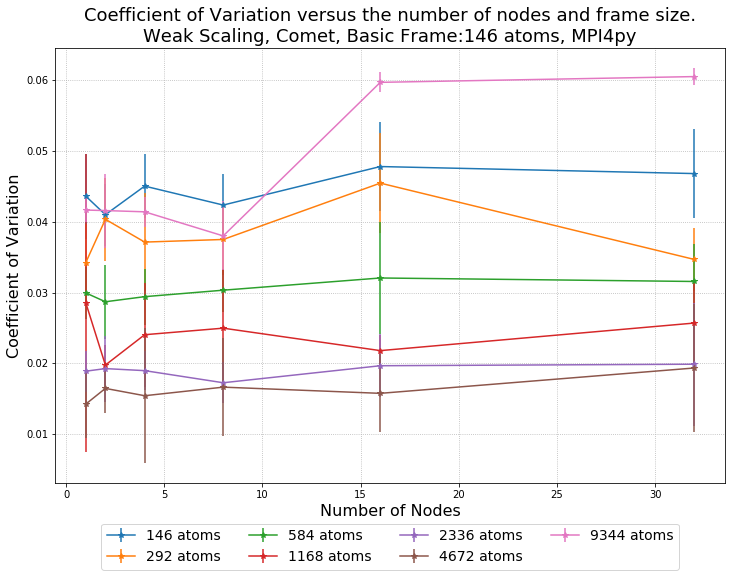

In [13]:
MPI4pyComet1      = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/UpTo32Nodes/comet_mpi4py_NoIOweakUpTo32.csv').drop(['Framework'],axis=1)
coeffCMPI4py      = task_coeff(MPI4pyComet1,nodes=[1,2,4,8,16,32])
MPI4pyComet1      = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/UpTo32Nodes/comet_mpi4py_NoIOweak292.csv').drop(['Framework'],axis=1)
coeffCMPI4py292   = task_coeff(MPI4pyComet1,nodes=[1,2,4,8,16,32])
MPI4pyComet1      = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/UpTo32Nodes/comet_mpi4py_NoIOweak584.csv').drop(['Framework'],axis=1)
coeffCMPI4py584   = task_coeff(MPI4pyComet1,nodes=[1,2,4,8,16,32])
MPI4pyComet1      = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/UpTo32Nodes/comet_mpi4py_NoIOweak1168.csv').drop(['Framework'],axis=1)
coeffCMPI4py1168  = task_coeff(MPI4pyComet1,nodes=[1,2,4,8,16,32])
MPI4pyComet1      = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/UpTo32Nodes/comet_mpi4py_NoIOweak2336.csv').drop(['Framework'],axis=1)
coeffCMPI4py2336  = task_coeff(MPI4pyComet1,nodes=[1,2,4,8,16,32])
MPI4pyComet1      = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/UpTo32Nodes/comet_mpi4py_NoIOweak4672.csv').drop(['Framework'],axis=1)
coeffCMPI4py4672  = task_coeff(MPI4pyComet1,nodes=[1,2,4,8,16,32])
MPI4pyComet1      = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/UpTo32Nodes/comet_mpi4py_NoIOweak9344.csv').drop(['Framework'],axis=1)
coeffCMPI4py9344  = task_coeff(MPI4pyComet1,nodes=[1,2,4,8,16,32])
MPI4pyComet1      = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/UpTo32Nodes/comet_mpi4py_NoIOweak18688.csv').drop(['Framework'],axis=1)
coeffCMPI4py18688 = task_coeff(MPI4pyComet1,nodes=[1,2,4,8,16,32])

fig,axes = plt.subplots(nrows=1,ncols=1, sharex=True,sharey=True,figsize=[12,8],gridspec_kw={'wspace':0.05, 'hspace':0.05})
axes.errorbar([1,2,4,8,16,32],[np.mean(D) for D in coeffCMPI4py],yerr=[np.std(D) for D in coeffCMPI4py],marker='*',label='146 atoms')
axes.errorbar([1,2,4,8,16,32],[np.mean(D) for D in coeffCMPI4py292],yerr=[np.std(D) for D in coeffCMPI4py292],marker='*',label='292 atoms')
axes.errorbar([1,2,4,8,16,32],[np.mean(D) for D in coeffCMPI4py584],yerr=[np.std(D) for D in coeffCMPI4py584],marker='*',label='584 atoms')
axes.errorbar([1,2,4,8,16,32],[np.mean(D) for D in coeffCMPI4py1168],yerr=[np.std(D) for D in coeffCMPI4py1168],marker='*',label='1168 atoms')
axes.errorbar([1,2,4,8,16,32],[np.mean(D) for D in coeffCMPI4py2336],yerr=[np.std(D) for D in coeffCMPI4py2336],marker='*',label='2336 atoms')
axes.errorbar([1,2,4,8,16,32],[np.mean(D) for D in coeffCMPI4py4672],yerr=[np.std(D) for D in coeffCMPI4py4672],marker='*',label='4672 atoms')
axes.errorbar([1,2,4,8,16,32],[np.mean(D) for D in coeffCMPI4py9344],yerr=[np.std(D) for D in coeffCMPI4py9344],marker='*',label='9344 atoms')
#axes.errorbar([1,2,4,8,16,32],[np.mean(D) for D in coeffCMPI4py18688],yerr=[np.std(D) for D in coeffCMPI4py18688],marker='*',label='18688 atoms')
axes.set_title('Coefficient of Variation versus the number of nodes and frame size.\nWeak Scaling, Comet, Basic Frame:146 atoms, MPI4py',fontsize=18)
axes.set_xlabel('Number of Nodes',fontsize=16)
axes.set_ylabel('Coefficient of Variation',fontsize=16)
axes.grid(axis='y',which='minor', linestyle=':')
axes.grid('on',linestyle=':')
axes.grid(axis='y',which='minor', linestyle=':')
axes.legend(fontsize=14,bbox_to_anchor=(0.,-0.2,1,0), loc='lower center',ncol=4, borderaxespad=0.)


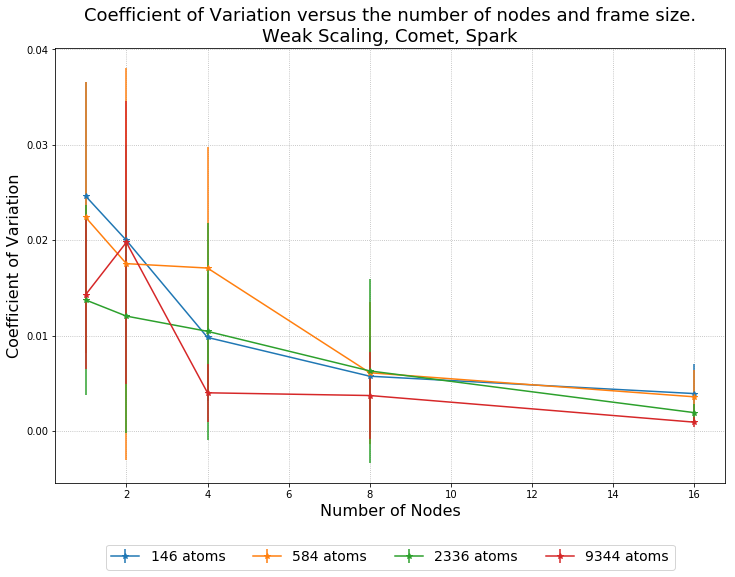

In [14]:
SparkComet1       = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/UpTo32Nodes/comet_spark_NoIOweak.csv').drop(['Framework'],axis=1)
coeffCSpark      = task_coeff(SparkComet1,nodes=[1,2,4,8,16])
SparkComet1       = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/UpTo32Nodes/comet_spark_NoIOweak584.csv').drop(['Framework'],axis=1)
coeffCSpark584   = task_coeff(SparkComet1,nodes=[1,2,4,8,16])
SparkComet1       = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/UpTo32Nodes/comet_spark_NoIOweak2336.csv').drop(['Framework'],axis=1)
coeffCSpark2336  = task_coeff(SparkComet1,nodes=[1,2,4,8,16])
SparkComet1       = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/UpTo32Nodes/comet_spark_NoIOweak9344.csv').drop(['Framework'],axis=1)
coeffCSpark9344  = task_coeff(SparkComet1,nodes=[1,2,4,8,16])

fig,axes = plt.subplots(nrows=1,ncols=1, sharex=True,sharey=True,figsize=[12,8],gridspec_kw={'wspace':0.05, 'hspace':0.05})
axes.errorbar([1,2,4,8,16],[np.mean(D) for D in coeffCSpark],yerr=[np.std(D) for D in coeffCSpark],marker='*',label='146 atoms')
axes.errorbar([1,2,4,8,16],[np.mean(D) for D in coeffCSpark584],yerr=[np.std(D) for D in coeffCSpark584],marker='*',label='584 atoms')
axes.errorbar([1,2,4,8,16],[np.mean(D) for D in coeffCSpark2336],yerr=[np.std(D) for D in coeffCSpark2336],marker='*',label='2336 atoms')
axes.errorbar([1,2,4,8,16],[np.mean(D) for D in coeffCSpark9344],yerr=[np.std(D) for D in coeffCSpark9344],marker='*',label='9344 atoms')
axes.set_title('Coefficient of Variation versus the number of nodes and frame size.\nWeak Scaling, Comet, Spark',fontsize=18)
axes.set_xlabel('Number of Nodes',fontsize=16)
axes.set_ylabel('Coefficient of Variation',fontsize=16)
axes.grid(axis='y',which='minor', linestyle=':')
axes.grid('on',linestyle=':')
axes.grid(axis='y',which='minor', linestyle=':')
axes.legend(fontsize=14,bbox_to_anchor=(0.,-0.2,1,0), loc='lower center',ncol=5, borderaxespad=0.)

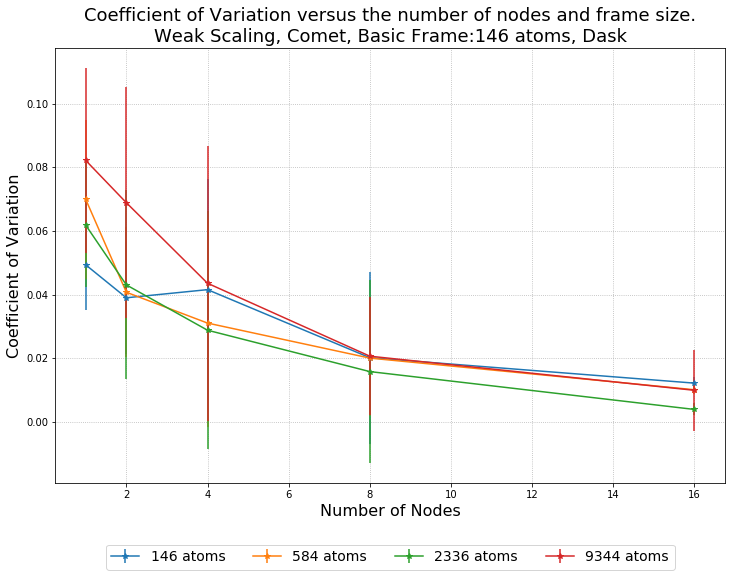

In [15]:
DaskComet       = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/UpTo32Nodes/comet_dask_NoIOweak146.csv').drop(['Framework'],axis=1)
coeffCDask      = task_coeff(DaskComet,nodes=[1,2,4,8,16])
DaskComet       = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/UpTo32Nodes/comet_dask_NoIOweak584.csv').drop(['Framework'],axis=1)
coeffCDask584   = task_coeff(DaskComet,nodes=[1,2,4,8,16])
DaskComet       = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/UpTo32Nodes/comet_dask_NoIOweak2336.csv').drop(['Framework'],axis=1)
coeffCDask2336  = task_coeff(DaskComet,nodes=[1,2,4,8,16])
DaskComet       = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/UpTo32Nodes/comet_dask_NoIOweak9344.csv').drop(['Framework'],axis=1)
coeffCDask9344  = task_coeff(DaskComet,nodes=[1,2,4,8,16])

fig,axes = plt.subplots(nrows=1,ncols=1, sharex=True,sharey=True,figsize=[12,8],gridspec_kw={'wspace':0.05, 'hspace':0.05})
axes.errorbar([1,2,4,8,16],[np.mean(D) for D in coeffCDask],yerr=[np.std(D) for D in coeffCDask],marker='*',label='146 atoms')
axes.errorbar([1,2,4,8,16],[np.mean(D) for D in coeffCDask584],yerr=[np.std(D) for D in coeffCDask584],marker='*',label='584 atoms')
axes.errorbar([1,2,4,8,16],[np.mean(D) for D in coeffCDask2336],yerr=[np.std(D) for D in coeffCDask2336],marker='*',label='2336 atoms')
axes.errorbar([1,2,4,8,16],[np.mean(D) for D in coeffCDask9344],yerr=[np.std(D) for D in coeffCDask9344],marker='*',label='9344 atoms')
axes.set_title('Coefficient of Variation versus the number of nodes and frame size.\nWeak Scaling, Comet, Basic Frame:146 atoms, Dask',fontsize=18)
axes.set_xlabel('Number of Nodes',fontsize=16)
axes.set_ylabel('Coefficient of Variation',fontsize=16)
axes.grid(axis='y',which='minor', linestyle=':')
axes.grid('on',linestyle=':')
axes.grid(axis='y',which='minor', linestyle=':')
axes.legend(fontsize=14,bbox_to_anchor=(0.,-0.2,1,0), loc='lower center',ncol=5, borderaxespad=0.)

## Straggler Existance

Text(0.5,-0.15,u'Probability of run having at least one straggler (L) based on framework and Fraction of straggler tasks (R)\nversus number of nodes.                  A task is considered a straggler when it is $50\\%$ from the median')

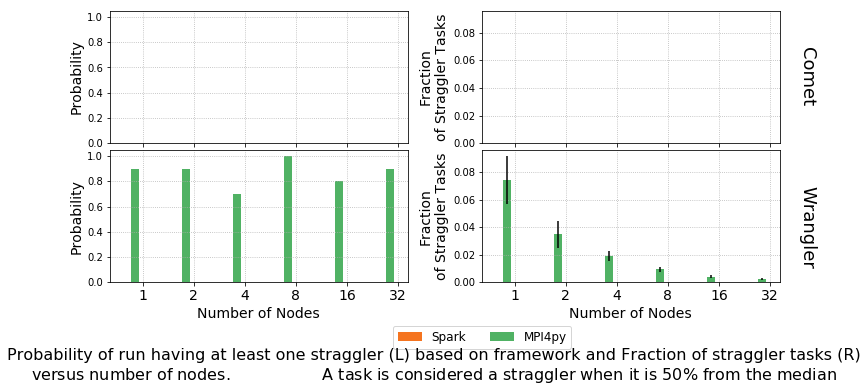

In [16]:
mult = 3
center = 'fifty'
SparkCDist,SparkCS,_   = straggler_freq(SparkComet,mult=mult,nodes=[1,2,4,8,16,32],center=center)
Mpi4pyCDist,MPI4pyCS,_ = straggler_freq(MPI4pyComet,mult=mult,nodes=[1,2,4,8,16,32],center=center)
SparkWDist,SparkWS,_   = straggler_freq(SparkWrangler,mult=mult,nodes=[1,2,4,8,16,32],center=center)
Mpi4pyWDist,MPI4pyWS,_ = straggler_freq(MPI4pyWrangler,mult=mult,nodes=[1,2,4,8,16,32],center=center)

fig,axes = plt.subplots(nrows=2,ncols=2, sharex=True,sharey='col',figsize=[12,5],gridspec_kw={'wspace':0.25, 'hspace':0.05})
x = np.arange(6)
width = 0.15
axes[0,0].bar(x-2*width,SparkCS,color=oranges(150),width=width,label='Spark')
axes[0,0].bar(x-1*width,MPI4pyCS,color=greens(150),width=width,label='MPI4py')
axes[1,0].bar(x-2*width,SparkWS,color=oranges(150),width=width,label='Spark')
axes[1,0].bar(x-1*width,MPI4pyWS,color=greens(150),width=width,label='MPI4py')
axes[0,1].bar(x-2*width,[np.mean(D) for D in SparkCDist], yerr=[np.std(D) for D in SparkCDist], color=oranges(150),width=width,label='Spark')
axes[0,1].bar(x-1*width,[np.mean(D) for D in Mpi4pyCDist],yerr=[np.std(D) for D in Mpi4pyCDist],color=greens(150), width=width,label='MPI4py')
axes[1,1].bar(x-2*width,[np.mean(D) for D in SparkWDist], yerr=[np.std(D) for D in SparkWDist], color=oranges(150),width=width,label='Spark')
axes[1,1].bar(x-1*width,[np.mean(D) for D in Mpi4pyWDist],yerr=[np.std(D) for D in Mpi4pyWDist],color=greens(150), width=width,label='MPI4py')
axes[0,0].grid('on',which='both',linestyle=':')
axes[1,0].grid('on',which='both',linestyle=':')
axes[1,0].set_xlabel('Number of Nodes',fontsize=14)
axes[1,0].set_xticks([0,1,2,3,4,5])
axes[1,0].set_xticklabels(['1','2','4','8','16','32'],fontsize=14)
axes[0,0].set_ylabel('Probability',fontsize=14)
axes[1,0].set_ylabel('Probability',fontsize=14)
axes[0,1].grid('on',which='both',linestyle=':')
axes[1,1].grid('on',which='both',linestyle=':')
axes[1,1].set_xlabel('Number of Nodes',fontsize=14)
axes[1,1].set_xticks([0,1,2,3,4,5])
axes[1,1].set_xticklabels(['1','2','4','8','16','32'],fontsize=14)
axes[0,1].set_ylabel('Fraction\nof Straggler Tasks',fontsize=14)
axes[1,1].set_ylabel('Fraction\nof Straggler Tasks',fontsize=14)
axes[0,1].text(5.55,0.07, 'Comet',fontsize=18,bbox={'facecolor':'grey', 'alpha':0, 'pad':8},horizontalalignment='left',verticalalignment='top',rotation=270)
axes[1,1].text(5.55,.07, 'Wrangler',fontsize=18,bbox={'facecolor':'grey', 'alpha':0, 'pad':8},horizontalalignment='left',verticalalignment='top',rotation=270)
axes[1,1].legend(['Spark','MPI4py'],fontsize=12,bbox_to_anchor=(0., -.5, 0,0), loc='lower center',ncol=5, borderaxespad=0.)
fig.text(.5, -.15, 'Probability of run having at least one straggler (L) based on framework and Fraction of straggler tasks (R)\nversus number of nodes.\
                  A task is considered a straggler when it is $50\%$ from the median', ha='center',fontsize=16)

Text(0.5,-0.15,u'Probability of run having at least one straggler (L) based on framework and Fraction of straggler tasks (R)\nversus number of nodes.                  A task is considered a straggler when it is $3\\sigma$ from the mean')

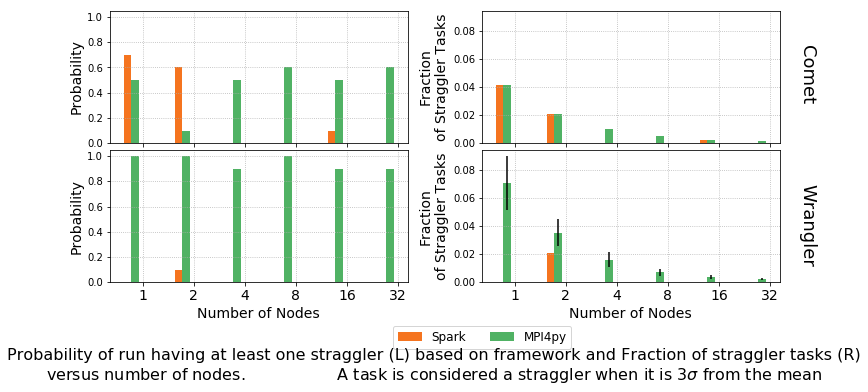

In [17]:
mult = 3
center = 'mean'
SparkCDist,SparkCS,_   = straggler_freq(SparkComet,mult=mult,nodes=[1,2,4,8,16,32],center=center)
Mpi4pyCDist,MPI4pyCS,_ = straggler_freq(MPI4pyComet,mult=mult,nodes=[1,2,4,8,16,32],center=center)
SparkWDist,SparkWS,_   = straggler_freq(SparkWrangler,mult=mult,nodes=[1,2,4,8,16,32],center=center)
Mpi4pyWDist,MPI4pyWS,_ = straggler_freq(MPI4pyWrangler,mult=mult,nodes=[1,2,4,8,16,32],center=center)

fig,axes = plt.subplots(nrows=2,ncols=2, sharex=True,sharey='col',figsize=[12,5],gridspec_kw={'wspace':0.25, 'hspace':0.05})
x = np.arange(6)
width = 0.15
axes[0,0].bar(x-2*width,SparkCS,color=oranges(150),width=width,label='Spark')
axes[0,0].bar(x-1*width,MPI4pyCS,color=greens(150),width=width,label='MPI4py')
axes[1,0].bar(x-2*width,SparkWS,color=oranges(150),width=width,label='Spark')
axes[1,0].bar(x-1*width,MPI4pyWS,color=greens(150),width=width,label='MPI4py')
axes[0,1].bar(x-2*width,[np.mean(D) for D in SparkCDist], yerr=[np.std(D) for D in SparkCDist], color=oranges(150),width=width,label='Spark')
axes[0,1].bar(x-1*width,[np.mean(D) for D in Mpi4pyCDist],yerr=[np.std(D) for D in Mpi4pyCDist],color=greens(150), width=width,label='MPI4py')
axes[1,1].bar(x-2*width,[np.mean(D) for D in SparkWDist], yerr=[np.std(D) for D in SparkWDist], color=oranges(150),width=width,label='Spark')
axes[1,1].bar(x-1*width,[np.mean(D) for D in Mpi4pyWDist],yerr=[np.std(D) for D in Mpi4pyWDist],color=greens(150), width=width,label='MPI4py')
axes[0,0].grid('on',which='both',linestyle=':')
axes[1,0].grid('on',which='both',linestyle=':')
axes[1,0].set_xlabel('Number of Nodes',fontsize=14)
axes[1,0].set_xticks([0,1,2,3,4,5])
axes[1,0].set_xticklabels(['1','2','4','8','16','32'],fontsize=14)
axes[0,0].set_ylabel('Probability',fontsize=14)
axes[1,0].set_ylabel('Probability',fontsize=14)
axes[0,1].grid('on',which='both',linestyle=':')
axes[1,1].grid('on',which='both',linestyle=':')
axes[1,1].set_xlabel('Number of Nodes',fontsize=14)
axes[1,1].set_xticks([0,1,2,3,4,5])
axes[1,1].set_xticklabels(['1','2','4','8','16','32'],fontsize=14)
axes[0,1].set_ylabel('Fraction\nof Straggler Tasks',fontsize=14)
axes[1,1].set_ylabel('Fraction\nof Straggler Tasks',fontsize=14)
axes[0,1].text(5.55,0.07, 'Comet',fontsize=18,bbox={'facecolor':'grey', 'alpha':0, 'pad':8},horizontalalignment='left',verticalalignment='top',rotation=270)
axes[1,1].text(5.55,.07, 'Wrangler',fontsize=18,bbox={'facecolor':'grey', 'alpha':0, 'pad':8},horizontalalignment='left',verticalalignment='top',rotation=270)
axes[1,1].legend(['Spark','MPI4py'],fontsize=12,bbox_to_anchor=(0., -.5, 0,0), loc='lower center',ncol=5, borderaxespad=0.)
fig.text(.5, -.15, 'Probability of run having at least one straggler (L) based on framework and Fraction of straggler tasks (R)\nversus number of nodes.\
                  A task is considered a straggler when it is $3\sigma$ from the mean', ha='center',fontsize=16)

Text(0.5,-0.15,u'Probability of run having at least one straggler (L) based on framework and Fraction of straggler tasks (R)\nversus number of nodes.                  A task is considered a straggler when it is $2\\sigma$ from the mean')

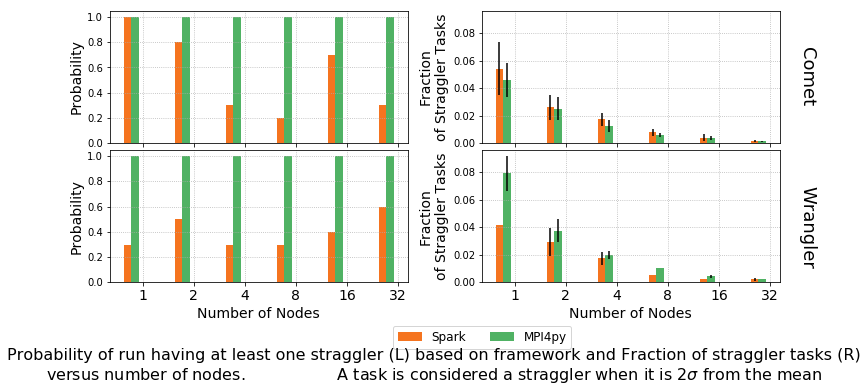

In [18]:
mult = 2
center = 'mean'
SparkCDist,SparkCS,_   = straggler_freq(SparkComet,mult=mult,nodes=[1,2,4,8,16,32],center=center)
Mpi4pyCDist,MPI4pyCS,_ = straggler_freq(MPI4pyComet,mult=mult,nodes=[1,2,4,8,16,32],center=center)
SparkWDist,SparkWS,_   = straggler_freq(SparkWrangler,mult=mult,nodes=[1,2,4,8,16,32],center=center)
Mpi4pyWDist,MPI4pyWS,_ = straggler_freq(MPI4pyWrangler,mult=mult,nodes=[1,2,4,8,16,32],center=center)

fig,axes = plt.subplots(nrows=2,ncols=2, sharex=True,sharey='col',figsize=[12,5],gridspec_kw={'wspace':0.25, 'hspace':0.05})
x = np.arange(6)
width = 0.15
axes[0,0].bar(x-2*width,SparkCS,color=oranges(150),width=width,label='Spark')
axes[0,0].bar(x-1*width,MPI4pyCS,color=greens(150),width=width,label='MPI4py')
axes[1,0].bar(x-2*width,SparkWS,color=oranges(150),width=width,label='Spark')
axes[1,0].bar(x-1*width,MPI4pyWS,color=greens(150),width=width,label='MPI4py')
axes[0,1].bar(x-2*width,[np.mean(D) for D in SparkCDist], yerr=[np.std(D) for D in SparkCDist], color=oranges(150),width=width,label='Spark')
axes[0,1].bar(x-1*width,[np.mean(D) for D in Mpi4pyCDist],yerr=[np.std(D) for D in Mpi4pyCDist],color=greens(150), width=width,label='MPI4py')
axes[1,1].bar(x-2*width,[np.mean(D) for D in SparkWDist], yerr=[np.std(D) for D in SparkWDist], color=oranges(150),width=width,label='Spark')
axes[1,1].bar(x-1*width,[np.mean(D) for D in Mpi4pyWDist],yerr=[np.std(D) for D in Mpi4pyWDist],color=greens(150), width=width,label='MPI4py')
axes[0,0].grid('on',which='both',linestyle=':')
axes[1,0].grid('on',which='both',linestyle=':')
axes[1,0].set_xlabel('Number of Nodes',fontsize=14)
axes[1,0].set_xticks([0,1,2,3,4,5])
axes[1,0].set_xticklabels(['1','2','4','8','16','32'],fontsize=14)
axes[0,0].set_ylabel('Probability',fontsize=14)
axes[1,0].set_ylabel('Probability',fontsize=14)
axes[0,1].grid('on',which='both',linestyle=':')
axes[1,1].grid('on',which='both',linestyle=':')
axes[1,1].set_xlabel('Number of Nodes',fontsize=14)
axes[1,1].set_xticks([0,1,2,3,4,5])
axes[1,1].set_xticklabels(['1','2','4','8','16','32'],fontsize=14)
axes[0,1].set_ylabel('Fraction\nof Straggler Tasks',fontsize=14)
axes[1,1].set_ylabel('Fraction\nof Straggler Tasks',fontsize=14)
axes[0,1].text(5.55,0.07, 'Comet',fontsize=18,bbox={'facecolor':'grey', 'alpha':0, 'pad':8},horizontalalignment='left',verticalalignment='top',rotation=270)
axes[1,1].text(5.55,.07, 'Wrangler',fontsize=18,bbox={'facecolor':'grey', 'alpha':0, 'pad':8},horizontalalignment='left',verticalalignment='top',rotation=270)
axes[1,1].legend(['Spark','MPI4py'],fontsize=12,bbox_to_anchor=(0., -.5, 0,0), loc='lower center',ncol=5, borderaxespad=0.)
fig.text(.5, -.15, 'Probability of run having at least one straggler (L) based on framework and Fraction of straggler tasks (R)\nversus number of nodes.\
                  A task is considered a straggler when it is $2\sigma$ from the mean', ha='center',fontsize=16)

Text(0.5,-0.15,u'Probability of run having at least one straggler (L) based on framework and Fraction of straggler tasks (R)\nversus number of nodes.                  A task is considered a straggler when it is $3\\sigma$ from the median')

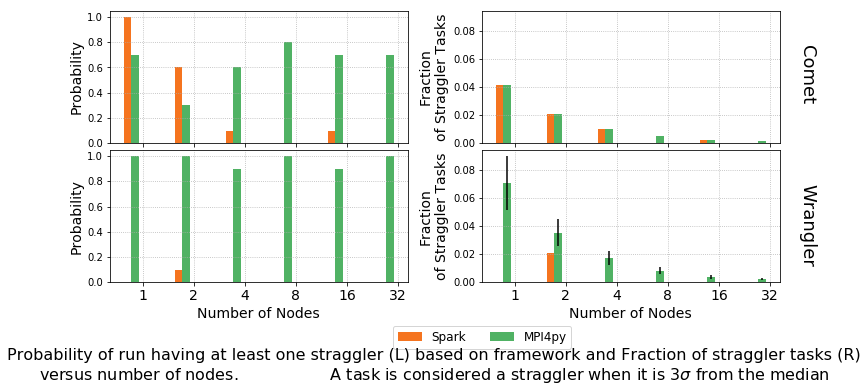

In [19]:
mult = 3
center = 'median'
SparkCDist,SparkCS,_   = straggler_freq(SparkComet,mult=mult,nodes=[1,2,4,8,16,32],center=center)
Mpi4pyCDist,MPI4pyCS,_ = straggler_freq(MPI4pyComet,mult=mult,nodes=[1,2,4,8,16,32],center=center)
SparkWDist,SparkWS,_   = straggler_freq(SparkWrangler,mult=mult,nodes=[1,2,4,8,16,32],center=center)
Mpi4pyWDist,MPI4pyWS,_ = straggler_freq(MPI4pyWrangler,mult=mult,nodes=[1,2,4,8,16,32],center=center)

fig,axes = plt.subplots(nrows=2,ncols=2, sharex=True,sharey='col',figsize=[12,5],gridspec_kw={'wspace':0.25, 'hspace':0.05})
x = np.arange(6)
width = 0.15
axes[0,0].bar(x-2*width,SparkCS,color=oranges(150),width=width,label='Spark')
axes[0,0].bar(x-1*width,MPI4pyCS,color=greens(150),width=width,label='MPI4py')
axes[1,0].bar(x-2*width,SparkWS,color=oranges(150),width=width,label='Spark')
axes[1,0].bar(x-1*width,MPI4pyWS,color=greens(150),width=width,label='MPI4py')
axes[0,1].bar(x-2*width,[np.mean(D) for D in SparkCDist], yerr=[np.std(D) for D in SparkCDist], color=oranges(150),width=width,label='Spark')
axes[0,1].bar(x-1*width,[np.mean(D) for D in Mpi4pyCDist],yerr=[np.std(D) for D in Mpi4pyCDist],color=greens(150), width=width,label='MPI4py')
axes[1,1].bar(x-2*width,[np.mean(D) for D in SparkWDist], yerr=[np.std(D) for D in SparkWDist], color=oranges(150),width=width,label='Spark')
axes[1,1].bar(x-1*width,[np.mean(D) for D in Mpi4pyWDist],yerr=[np.std(D) for D in Mpi4pyWDist],color=greens(150), width=width,label='MPI4py')
axes[0,0].grid('on',which='both',linestyle=':')
axes[1,0].grid('on',which='both',linestyle=':')
axes[1,0].set_xlabel('Number of Nodes',fontsize=14)
axes[1,0].set_xticks([0,1,2,3,4,5])
axes[1,0].set_xticklabels(['1','2','4','8','16','32'],fontsize=14)
axes[0,0].set_ylabel('Probability',fontsize=14)
axes[1,0].set_ylabel('Probability',fontsize=14)
axes[0,1].grid('on',which='both',linestyle=':')
axes[1,1].grid('on',which='both',linestyle=':')
axes[1,1].set_xlabel('Number of Nodes',fontsize=14)
axes[1,1].set_xticks([0,1,2,3,4,5])
axes[1,1].set_xticklabels(['1','2','4','8','16','32'],fontsize=14)
axes[0,1].set_ylabel('Fraction\nof Straggler Tasks',fontsize=14)
axes[1,1].set_ylabel('Fraction\nof Straggler Tasks',fontsize=14)
axes[0,1].text(5.55,0.07, 'Comet',fontsize=18,bbox={'facecolor':'grey', 'alpha':0, 'pad':8},horizontalalignment='left',verticalalignment='top',rotation=270)
axes[1,1].text(5.55,.07, 'Wrangler',fontsize=18,bbox={'facecolor':'grey', 'alpha':0, 'pad':8},horizontalalignment='left',verticalalignment='top',rotation=270)
axes[1,1].legend(['Spark','MPI4py'],fontsize=12,bbox_to_anchor=(0., -.5, 0,0), loc='lower center',ncol=5, borderaxespad=0.)
fig.text(.5, -.15, 'Probability of run having at least one straggler (L) based on framework and Fraction of straggler tasks (R)\nversus number of nodes.\
                  A task is considered a straggler when it is $3\sigma$ from the median', ha='center',fontsize=16)

Text(0.5,-0.15,u'Probability of run having at least one straggler (L) based on framework and Fraction of straggler tasks (R)\nversus number of nodes.                  A task is considered a straggler when it is $2\\sigma$ from the median')

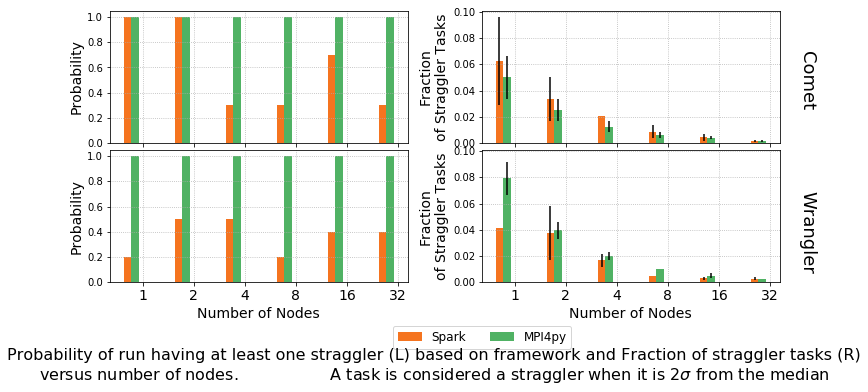

In [20]:
mult = 2
center = 'median'
SparkCDist,SparkCS,_   = straggler_freq(SparkComet,mult=mult,nodes=[1,2,4,8,16,32],center=center)
Mpi4pyCDist,MPI4pyCS,_ = straggler_freq(MPI4pyComet,mult=mult,nodes=[1,2,4,8,16,32],center=center)
SparkWDist,SparkWS,_   = straggler_freq(SparkWrangler,mult=mult,nodes=[1,2,4,8,16,32],center=center)
Mpi4pyWDist,MPI4pyWS,_ = straggler_freq(MPI4pyWrangler,mult=mult,nodes=[1,2,4,8,16,32],center=center)

fig,axes = plt.subplots(nrows=2,ncols=2, sharex=True,sharey='col',figsize=[12,5],gridspec_kw={'wspace':0.25, 'hspace':0.05})
x = np.arange(6)
width = 0.15
axes[0,0].bar(x-2*width,SparkCS,color=oranges(150),width=width,label='Spark')
axes[0,0].bar(x-1*width,MPI4pyCS,color=greens(150),width=width,label='MPI4py')
axes[1,0].bar(x-2*width,SparkWS,color=oranges(150),width=width,label='Spark')
axes[1,0].bar(x-1*width,MPI4pyWS,color=greens(150),width=width,label='MPI4py')
axes[0,1].bar(x-2*width,[np.mean(D) for D in SparkCDist], yerr=[np.std(D) for D in SparkCDist], color=oranges(150),width=width,label='Spark')
axes[0,1].bar(x-1*width,[np.mean(D) for D in Mpi4pyCDist],yerr=[np.std(D) for D in Mpi4pyCDist],color=greens(150), width=width,label='MPI4py')
axes[1,1].bar(x-2*width,[np.mean(D) for D in SparkWDist], yerr=[np.std(D) for D in SparkWDist], color=oranges(150),width=width,label='Spark')
axes[1,1].bar(x-1*width,[np.mean(D) for D in Mpi4pyWDist],yerr=[np.std(D) for D in Mpi4pyWDist],color=greens(150), width=width,label='MPI4py')
axes[0,0].grid('on',which='both',linestyle=':')
axes[1,0].grid('on',which='both',linestyle=':')
axes[1,0].set_xlabel('Number of Nodes',fontsize=14)
axes[1,0].set_xticks([0,1,2,3,4,5])
axes[1,0].set_xticklabels(['1','2','4','8','16','32'],fontsize=14)
axes[0,0].set_ylabel('Probability',fontsize=14)
axes[1,0].set_ylabel('Probability',fontsize=14)
axes[0,1].grid('on',which='both',linestyle=':')
axes[1,1].grid('on',which='both',linestyle=':')
axes[1,1].set_xlabel('Number of Nodes',fontsize=14)
axes[1,1].set_xticks([0,1,2,3,4,5])
axes[1,1].set_xticklabels(['1','2','4','8','16','32'],fontsize=14)
axes[0,1].set_ylabel('Fraction\nof Straggler Tasks',fontsize=14)
axes[1,1].set_ylabel('Fraction\nof Straggler Tasks',fontsize=14)
axes[0,1].text(5.55,0.07, 'Comet',fontsize=18,bbox={'facecolor':'grey', 'alpha':0, 'pad':8},horizontalalignment='left',verticalalignment='top',rotation=270)
axes[1,1].text(5.55,.07, 'Wrangler',fontsize=18,bbox={'facecolor':'grey', 'alpha':0, 'pad':8},horizontalalignment='left',verticalalignment='top',rotation=270)
axes[1,1].legend(['Spark','MPI4py'],fontsize=12,bbox_to_anchor=(0., -.5, 0,0), loc='lower center',ncol=5, borderaxespad=0.)
fig.text(.5, -.15, 'Probability of run having at least one straggler (L) based on framework and Fraction of straggler tasks (R)\nversus number of nodes.\
                  A task is considered a straggler when it is $2\sigma$ from the median', ha='center',fontsize=16)